<a href="https://colab.research.google.com/github/yeseul98/ML_Titanic/blob/master/%5BML%5DTitanic_Survived_probability.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##데이터를 불러올 때 필요한 서버 설정

In [ ]:
pip install kaggle --upgrade

Requirement already up-to-date: kaggle in /usr/local/lib/python3.6/dist-packages (1.5.6)


In [ ]:
!pwd

/content


In [ ]:
!mkdir -p ~/.kaggle
!cp "/content/drive/My Drive/[MachineLearning]kaggle/kaggle.json" ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle -v

Kaggle API 1.5.4


In [ ]:
!kaggle competitions list

ref                                            deadline             category            reward  teamCount  userHasEntered  
---------------------------------------------  -------------------  ---------------  ---------  ---------  --------------  
tpu-getting-started                            2030-06-03 23:59:00  Getting Started      Kudos        121           False  
digit-recognizer                               2030-01-01 00:00:00  Getting Started  Knowledge       3073           False  
titanic                                        2030-01-01 00:00:00  Getting Started  Knowledge      23341            True  
house-prices-advanced-regression-techniques    2030-01-01 00:00:00  Getting Started  Knowledge       5128           False  
connectx                                       2030-01-01 00:00:00  Getting Started  Knowledge        661           False  
nlp-getting-started                            2030-01-01 00:00:00  Getting Started      Kudos       1503           False  
competit

In [ ]:
!kaggle competitions download -c titanic

  0% 0.00/59.8k [00:00<?, ?B/s]
100% 59.8k/59.8k [00:00<00:00, 22.7MB/s]
  0% 0.00/28.0k [00:00<?, ?B/s]
100% 28.0k/28.0k [00:00<00:00, 25.7MB/s]
  0% 0.00/3.18k [00:00<?, ?B/s]
100% 3.18k/3.18k [00:00<00:00, 2.67MB/s]


##1. 타이타닉 파일 불러오기 

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as plt

In [ ]:
df_train = pd.read_csv('./train.csv')
df_test = pd.read_csv('./test.csv')

(1) 파일

* train.csv : 분석해야하는 파일, 모델을 학습시킬 때 사용됩니다.
* test.csv : 학습한 모델을 가지고 예측해야 합니다. 

(2) 데이터 확인
* .head()

 : 데이터의 정보를 확인 할 수 있다.

 : ()속에 갯수를 지정하지 않으면 기본적으로 5개의 list를 보여줌





In [ ]:
df_train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


* .info()

 : 데이터의 정보를 제공해 줌

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


(4) 데이터 내용

* PassengerId : 승객 수

* Survived : 생존 여부 (0: 사망, 1: 생존)     
* Pclass : 좌석 등급      
* Name : 이름        
* Sex  : 성별        
* Age  : 나이       
* SibSp  : 함께  탑승한 형제 / 배우자의 수   
* Parch :   함께 탑승한 부모 / 아이의 수  
* Ticket  : 티켓 번호     
* Fare : 탑승 요금        
* Cabin  : 객실 번호      
* Embarked : 선착장

##2. 전체데이터 시각화하기

* 히스토그램을 이용해서 숫자로 구성된 데이터의 형태를 살펴본다.
 
 : 숫자로 이루어진 데이터만 가능하다.



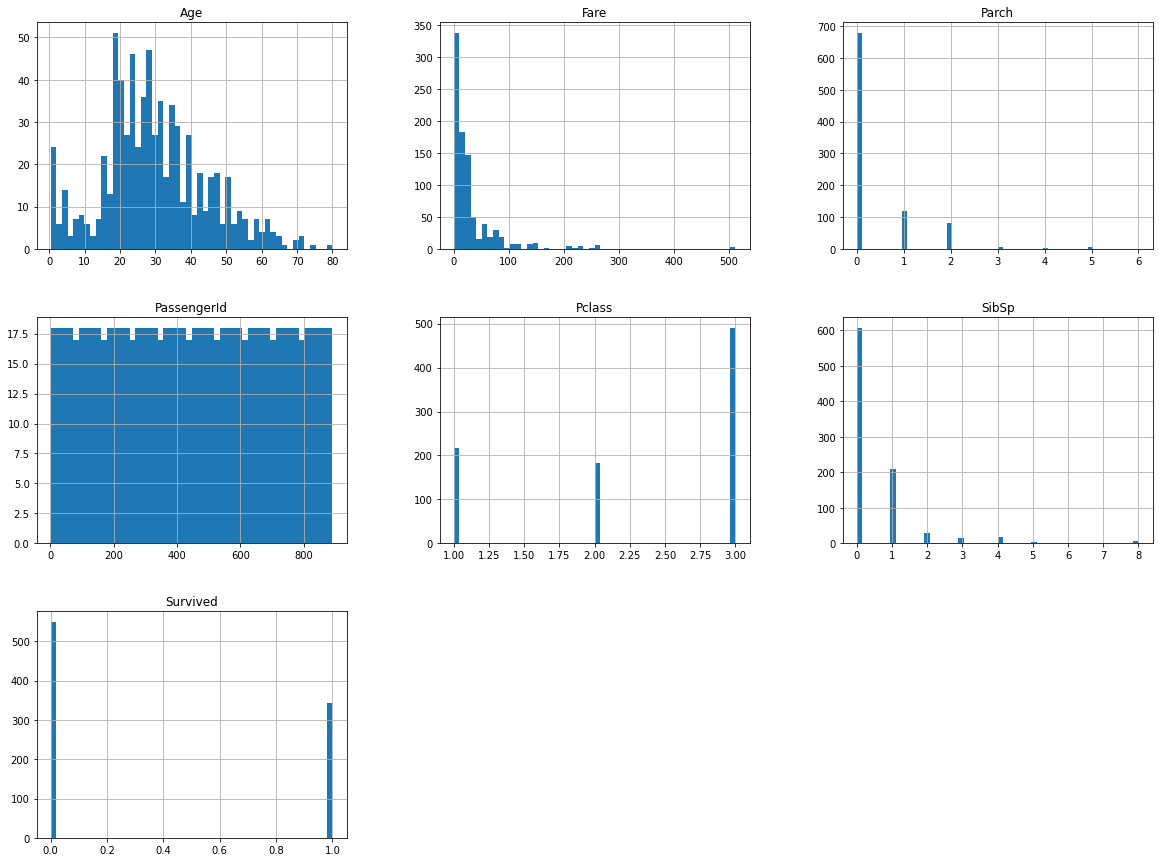

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
df_train.hist(bins=50, figsize=(20,15))
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff285449b38>,
      dtype=object)

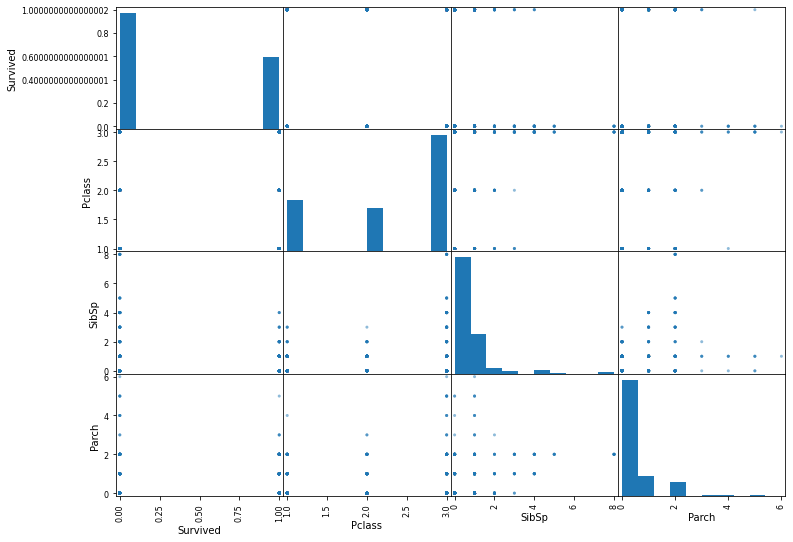

In [ ]:
from pandas.plotting import scatter_matrix

attributes = ["Survived",
              "Pclass",
              "SibSp",
              "Parch"]
scatter_matrix(df_train[attributes], figsize=(12,9))

##2-1. 데이터 전처리 후 시각화

In [ ]:
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


(1) 데이터 추가하기 

* Person데이터를 만든다.

 : Sex과 Age를 이용해서 male, female, children 으로 분류

 : Age_14 미만는 children으로 나머지 데이터는 그대로 성별을 유지한다.

In [ ]:
def titanic_children(Passenger):
  Age, Sex = Passenger
  if Age <14:
    return 'child'
  else:
    return Sex

df_train['Person'] = df_train[['Age','Sex']].apply(titanic_children, axis=1)
df_test['Person'] = df_train[['Age','Sex']].apply(titanic_children, axis=1)

*  Person 데이터 만들기

 : Parch, SibSp를 이용해서 가족 구성원을 파악한 데이터를 만든다.

  : 자신을 포함해야 하기 때문에 +1을 해야줘야 합니다.

In [ ]:
df_train['Family'] = df_train['Parch'] + df_train['SibSp'] +1
df_test['Family'] = df_test['Parch'] + df_test['SibSp'] +1

*  데이터가 추가 되었는지 확인해줍니다.

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
 12  Person       891 non-null    object 
 13  Family       891 non-null    int64  
dtypes: float64(2), int64(6), object(6)
memory usage: 97.6+ KB


In [ ]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
 11  Person       418 non-null    object 
 12  Family       418 non-null    int64  
dtypes: float64(2), int64(5), object(6)
memory usage: 42.6+ KB


(2) NUll data 확인

 *  Age, Cabin, Embarked에 비어있는 값이 존재합니다.

 : NULL 값이 있으면 정확성이 떨어지고 모델링 할 때 오류가 발생할 수 있습니다.

In [ ]:
for col in df_train.columns:
  msg = 'column: {:>10}\t percent of NAN value: {:.2f}%'.format(col, 100* (df_train[col].isnull().sum() / df_train[col].shape[0]) )
  print(msg)

column: PassengerId	 percent of NAN value: 0.00%
column:   Survived	 percent of NAN value: 0.00%
column:     Pclass	 percent of NAN value: 0.00%
column:       Name	 percent of NAN value: 0.00%
column:        Sex	 percent of NAN value: 0.00%
column:        Age	 percent of NAN value: 19.87%
column:      SibSp	 percent of NAN value: 0.00%
column:      Parch	 percent of NAN value: 0.00%
column:     Ticket	 percent of NAN value: 0.00%
column:       Fare	 percent of NAN value: 0.00%
column:      Cabin	 percent of NAN value: 77.10%
column:   Embarked	 percent of NAN value: 0.22%
column:     Person	 percent of NAN value: 0.00%
column:     Family	 percent of NAN value: 0.00%


In [ ]:
for col in df_test.columns:
  msg = 'column: {:>10}\t percent of NAN value: {:.2f}%'.format(col, 100* (df_test[col].isnull().sum() / df_test[col].shape[0]) )
  print(msg)

column: PassengerId	 percent of NAN value: 0.00%
column:     Pclass	 percent of NAN value: 0.00%
column:       Name	 percent of NAN value: 0.00%
column:        Sex	 percent of NAN value: 0.00%
column:        Age	 percent of NAN value: 20.57%
column:      SibSp	 percent of NAN value: 0.00%
column:      Parch	 percent of NAN value: 0.00%
column:     Ticket	 percent of NAN value: 0.00%
column:       Fare	 percent of NAN value: 0.24%
column:      Cabin	 percent of NAN value: 78.23%
column:   Embarked	 percent of NAN value: 0.00%
column:     Person	 percent of NAN value: 0.00%
column:     Family	 percent of NAN value: 0.00%


[1] Survived

1.1 데이터 확인

*   0: 사망 , 1: 생존

 : 생존한 사람보다 사망한 사람이 더 많다는 것을 알 수 있습니다.

In [ ]:
df_train['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


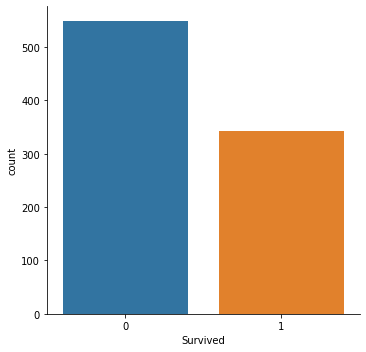

In [ ]:
sns.factorplot('Survived', data=df_train, kind='count')

[2] Sex

2.1 Sex데이터 확인

*  여성보다 남자가 더 많이 탑승했다.

In [ ]:
df_train['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


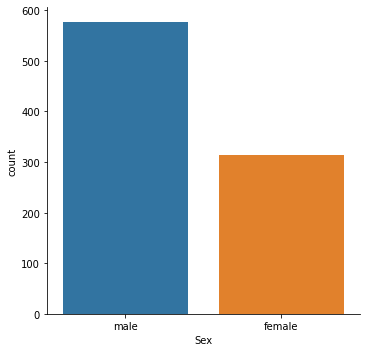

In [ ]:
sns.factorplot('Sex', data=df_train, kind='count')

2.2 성별에 따른 생존확인

*  남자에 비해 여자가 더 많이 생존했음을 알 수 있습니다.

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


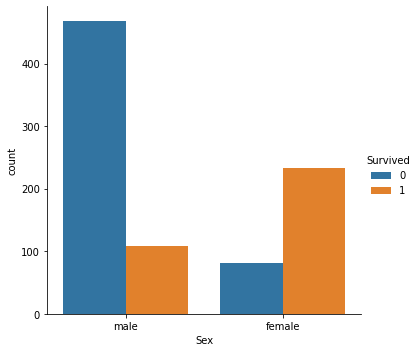

In [ ]:
sns.factorplot('Sex', data=df_train, hue='Survived', kind='count')

2.3 숫자로 변환
> male = 0, female = 1로 변환

*  모델링을 하기 위해서 문자를 숫자로 변환해 준다. 

In [ ]:
df_train.Sex = df_train.Sex.replace('male', 0)
df_train.Sex = df_train.Sex.replace('female', 1)
df_test.Sex = df_test.Sex.replace('male', 0)
df_test.Sex = df_test.Sex.replace('female', 1)

[3] Age

3.1 데이터 확인
> 연속적인 데이터가 많아서 히스토그램을 사용해서 생존을 판단함

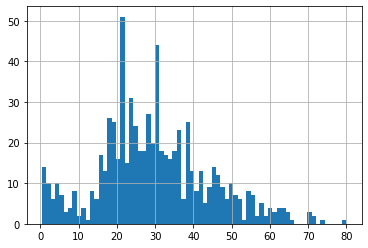

In [ ]:
 df_train['Age'].hist(bins=70)

*  ~ 10대, 40~ 대는 생존확률이 더 높다.

* 20 ~ 30대는 사망확률이 더 높다.
 
 : 그래프를 통해서 청/중년층이 많이 사망한 것을 알 수 있다.

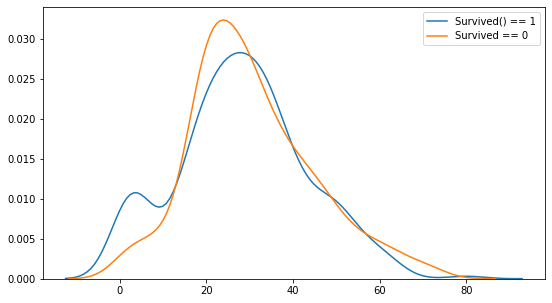

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(9, 5))
sns.kdeplot(df_train[df_train['Survived'] == 1]['Age'], ax=ax)
sns.kdeplot(df_train[df_train['Survived'] == 0]['Age'], ax=ax)
plt.legend(['Survive == 1', 'Dead == 0'])
plt.show()

3.2 NULL값 제거

 : 비어 있거나 잘못 된 값을 없애준다. 

In [ ]:
df_train['Age'].fillna(df_train['Age'].mean(), inplace=True)
df_test['Age'].fillna(df_test['Age'].mean(), inplace=True)

3.3 연령대에 따라 숫자로 변환
*  나중에 생존률을 확인하기 편리하게 나눠줍니다.



In [ ]:
def age_rate(Age):
  age = ''
  if Age <= -1:
    age = 0
  elif Age <= 1:
    age = 1
  elif Age <= 6:
    age = 2
  elif Age <= 12:
    age = 3
  elif Age <= 22:
    age = 4
  elif Age <= 40:
    age = 5
  elif Age <= 60:
    age = 6
  else:
    age = 7
  return age

df_train['Age'] = df_train['Age'].apply(age_rate)
df_test['Age'] = df_test['Age'].apply(age_rate)

[4] Person

4.1 데이터 확인

*  남자, 여자, 어린이 순으로 적다.


In [ ]:
df_train['Person'].value_counts()

male      540
female    280
child      71
Name: Person, dtype: int64

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


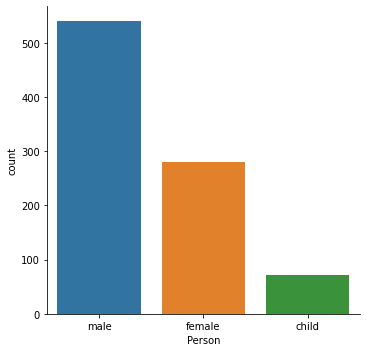

In [ ]:
sns.factorplot('Person', data=df_train, kind='count')

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


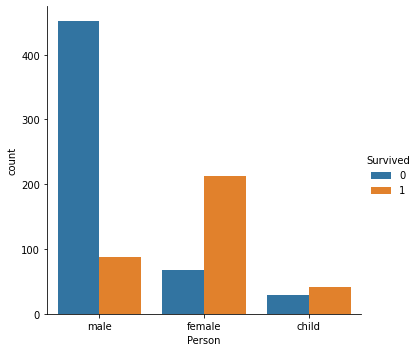

In [ ]:
sns.factorplot('Person', data=df_train, hue='Survived', kind='count')

*  남자에 비해서 여자와 아이들이 더 많이 생존했음을 알 수 있다.

 : 사람 수에 비해서 남자가 살 확률이 매우 적다는 것을 알 수 있다.




4.2 숫자로 변환

In [ ]:
#train_set
df_train.Person = df_train.Person.replace('male', 0)
df_train.Person = df_train.Person.replace('female', 1)
df_train.Person = df_train.Person.replace('child', 2)

#test_set
df_test.Person = df_test.Person.replace('male', 0)
df_test.Person = df_test.Person.replace('female', 1)
df_test.Person = df_test.Person.replace('child', 2)

[5] Pclass

5.1 데이터 확인

*  3등급 승객에 많은 것을 알 수 있다.

 : 1등급, 3등급, 3등급 순으로 생존률이 높다.

*  좌석등급에 따라서 생존률이 달라짐을 확인할수있다.

In [ ]:
df_train['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


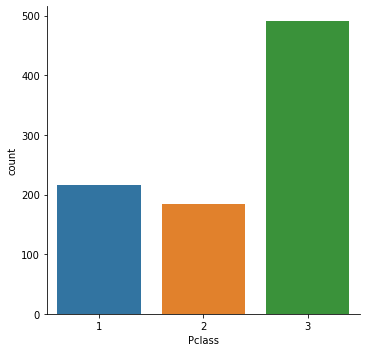

In [ ]:
sns.factorplot('Pclass', data=df_train, kind='count')

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


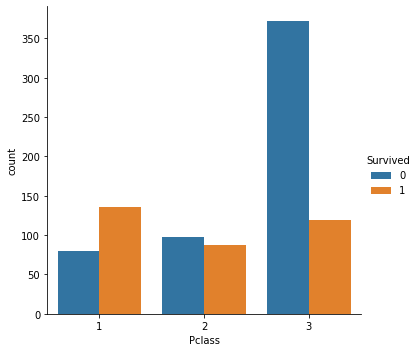

In [ ]:
sns.factorplot('Pclass', data=df_train, hue='Survived', kind='count')

5.2 좌석등급에 따른 사람확인

*  3등급에 남자과 어린이가 많이 탑승했다.

* 여자는 모든 등급에 거의 비슷하게 탑승했다.

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


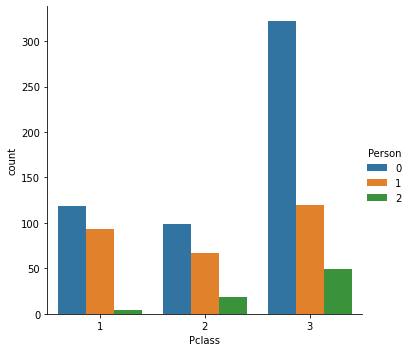

In [ ]:
sns.factorplot('Pclass', data=df_train, hue='Person', kind='count')

[6] SibSp

6.1 데이터 확인

*  혼자 탑승한 사람이 가장 많고 그 다음으로 일행 1명과 탑승한 사람이 많다.

* 혼자 탑승한 사람은 사람 수에 비해 사망률이 높고 일행 1명과 탑승한 사람은 생존률이 높다.

*  많은 인원과 탑승할수록 사망률이 증가한다. 

In [ ]:
df_train['SibSp'].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


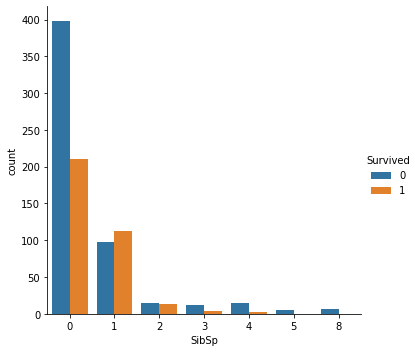

In [ ]:
sns.factorplot('SibSp', data=df_train,hue='Survived', kind='count')

[7] Parch

7.1 데이터 확인

*  SibSp와 비슷하게 생존률과 사망률이 발생한다.


In [ ]:
df_train['Parch'].value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


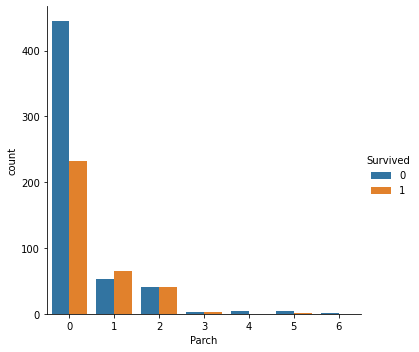

In [ ]:
sns.factorplot('Parch', data=df_train, hue='Survived', kind='count')

[8] Family

8.1 데이터 확인

*  2~4인 가족은 생존률이 높고 나머지는 사망률이 높음을 알 수있다.

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


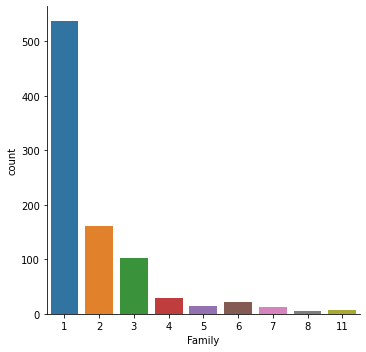

In [ ]:
sns.factorplot('Family', data=df_train, kind='count')

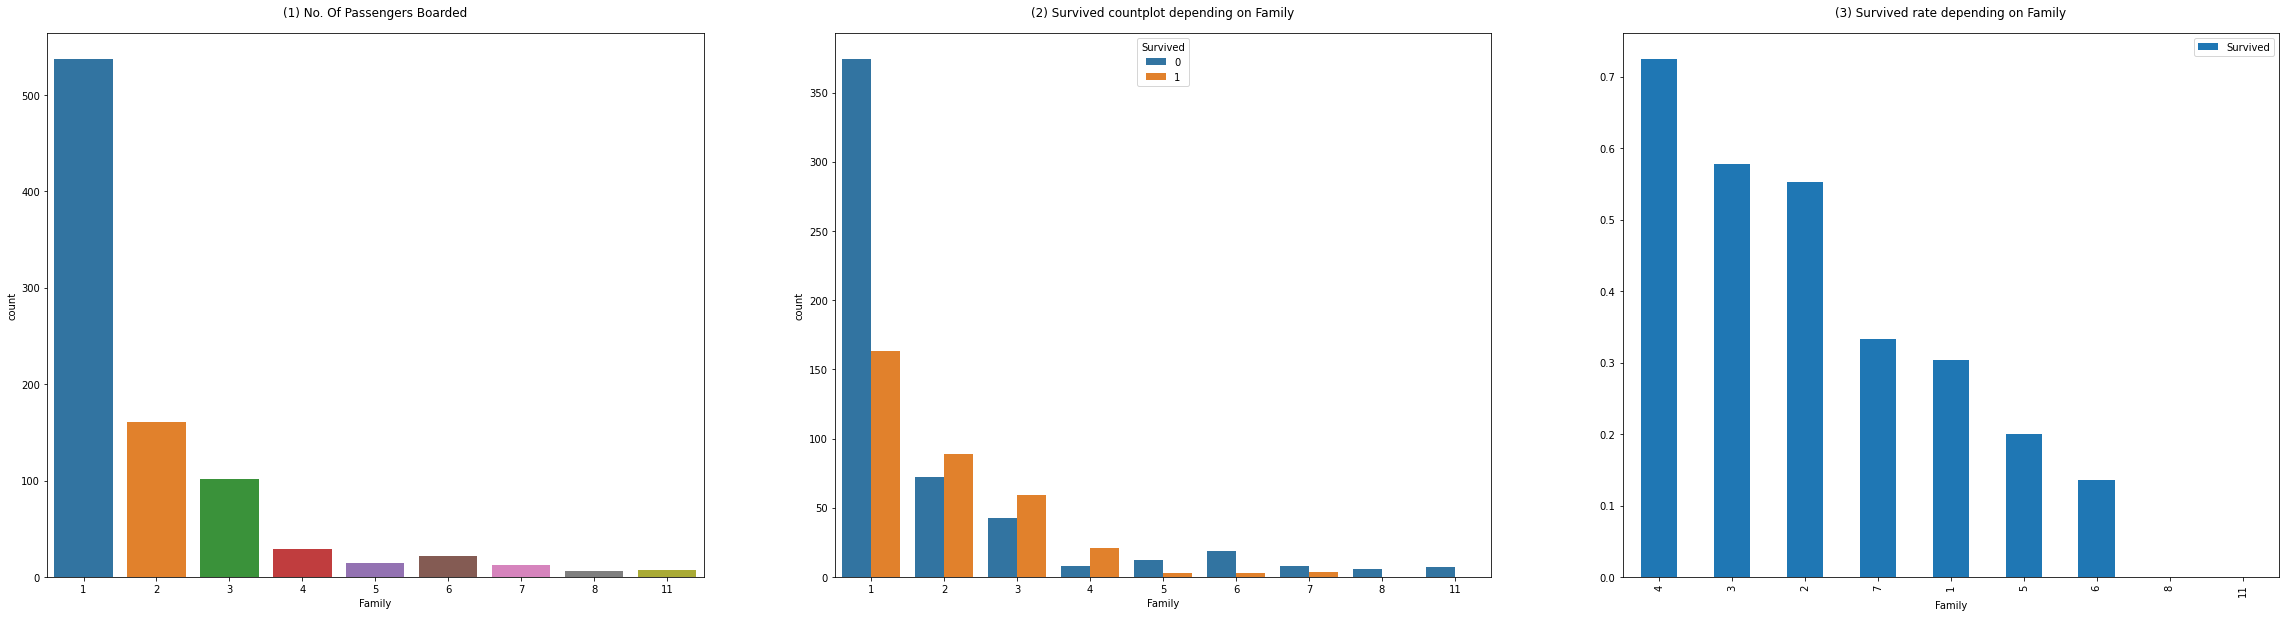

In [ ]:
sns.countplot('Family', hue='Survived', data=df_train, ax=ax[1])
ax[1].set_title('(2) Survived countplot depending on Family',  y=1.02)

[9] Cabin

9.1 NULL값을 처리 함

* NULL값의 비율이 높기 때문에 먼저 없애준다. 

In [ ]:
df_train['Cabin'].fillna('N', inplace = True)
df_test['Cabin'].fillna('N', inplace = True)

> 데이터 셋에서 null의 갯수를 다 더한다.
>
>  sum의 sum은 각 칼럼들의 합을 나다낸다.





In [ ]:
df_train.isnull().sum().sum()

2

In [ ]:
df_test.isnull().sum().sum()

1

9.2 데이터 확인

*  데이터마다 고유숫자가 존재한다.


In [ ]:
df_train['Cabin'].value_counts()

N              687
G6               4
C23 C25 C27      4
B96 B98          4
F2               3
              ... 
B86              1
A23              1
F G63            1
C148             1
A26              1
Name: Cabin, Length: 148, dtype: int64

9.3 Cabin의 데이터에 첫글자만 사용

   :  알파벳 뒤에 붙는 숫자까지해서 구하면 데이터가 복잡해지고 정확률이 떨어짐



In [ ]:
df_train['Cabin'] = df_train['Cabin'].str[:1]
df_train["Cabin"].value_counts()

N    687
C     59
B     47
D     33
E     32
A     15
F     13
G      4
T      1
Name: Cabin, dtype: int64

In [ ]:
df_test['Cabin'] = df_test['Cabin'].str[:1]
df_test["Cabin"].value_counts()

N    327
C     35
B     18
D     13
E      9
F      8
A      7
G      1
Name: Cabin, dtype: int64

9.4  생존률 확인

*  C,B,D,E 객실을 사용한 승객의 생존률이 높다.

 :  객실을 알면 생존률이 높음을 예상할 수 있다.

*  N: 객실을 알 수 없는 승객들이다.

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


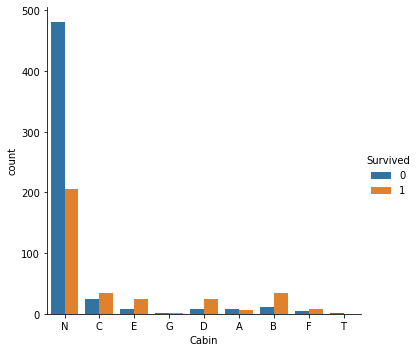

In [ ]:
sns.factorplot('Cabin', data=df_train,hue='Survived', kind='count')

9.4 알파벳 별로 숫자로 변환

In [ ]:
#Cabin_train_set
df_train.Cabin = df_train.Cabin.replace('N', 0)
df_train.Cabin = df_train.Cabin.replace('A', 1)
df_train.Cabin = df_train.Cabin.replace('B', 2)
df_train.Cabin = df_train.Cabin.replace('C', 3)
df_train.Cabin = df_train.Cabin.replace('D', 4)
df_train.Cabin = df_train.Cabin.replace('E', 5)
df_train.Cabin = df_train.Cabin.replace('F', 6)
df_train.Cabin = df_train.Cabin.replace('G', 7)
df_train.Cabin = df_train.Cabin.replace('T', 8)

#Cabin_test_set
df_test.Cabin = df_test.Cabin.replace('N', 0)
df_test.Cabin = df_test.Cabin.replace('A', 1)
df_test.Cabin = df_test.Cabin.replace('B', 2)
df_test.Cabin = df_test.Cabin.replace('C', 3)
df_test.Cabin = df_test.Cabin.replace('D', 4)
df_test.Cabin = df_test.Cabin.replace('E', 5)
df_test.Cabin = df_test.Cabin.replace('F', 6)
df_test.Cabin = df_test.Cabin.replace('G', 7)
df_test.Cabin = df_test.Cabin.replace('T', 8)

[10] Embarked

10.1 데이터 확인

*   S, C, Q가 생존에 따라서 비율이 크게 차이가 나지 않기 때문에 생략하는 것이 좋다.

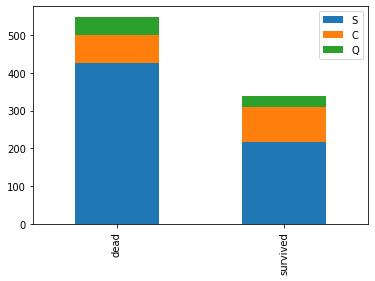

In [ ]:
dead = df_train[df_train['Survived']==0]['Embarked'].value_counts()
survived = df_train[df_train['Survived']==1]['Embarked'].value_counts()
df = pd.DataFrame([dead, survived])
df.index=['dead','survived']
df
df.plot(kind='bar', stacked = True)

*  train과 test에 있는 'Embarked'값을 제거해준다.

In [ ]:
df_train.drop('Embarked', axis =1, inplace=True)

In [ ]:
df_test.drop('Embarked', axis =1, inplace=True)

In [ ]:
#제거가 되었는지 확인절차
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    int64  
 5   Age          891 non-null    int64  
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    int64  
 11  Person       891 non-null    int64  
 12  Family       891 non-null    int64  
dtypes: float64(1), int64(10), object(2)
memory usage: 90.6+ KB


[11] 생존과 관계성이 떨어지는 데이터 제거
* Passengerld, Name, Ticket, Fare

In [ ]:
#PassengerId
df_train.drop('PassengerId', axis=1, inplace=True)
df_test.drop('PassengerId', axis=1, inplace=True)

#Name
df_train.drop('Name', axis=1, inplace=True)
df_test.drop('Name', axis=1, inplace=True)

#Ticket
df_train.drop('Ticket', axis=1, inplace=True)
df_test.drop('Ticket', axis=1, inplace=True)

#Fare
df_train.drop('Fare', axis=1, inplace=True)
df_test.drop('Fare', axis=1, inplace=True)

In [ ]:
df_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Cabin,Person,Family
0,0,3,0,4,1,0,0,0,2
1,1,1,1,5,1,0,3,1,2
2,1,3,1,5,0,0,0,1,1
3,1,1,1,5,1,0,3,1,2
4,0,3,0,5,0,0,0,0,1


In [ ]:
df_test.head()

,Pclass,Sex,Age,SibSp,Parch,Cabin,Person,Family
0,3,0,5,0,0,0,0,1
1,3,1,6,1,0,0,1,2
2,2,0,7,0,0,0,1,1
3,3,0,5,0,0,0,1,1
4,3,1,4,1,1,0,0,3


##3. 모델 학습

* trainingset에서 훈련하고 평가하기

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

* Survived를 뺀 나머지 데이터를 한 객체에 넣어서 생존률의 정확도를 예측한다.

In [ ]:
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Cabin', 'Person', 'Family']

In [ ]:
X = df_train[features]
y = df_train['Survived']

* 전체 데이터에서 X_tset ,y_test로 20%를 랜덤으로 만든다.

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

* # DecisionTreeClassifier 학습/예측/평가

In [ ]:
dt_clf = DecisionTreeClassifier(random_state=42)

dt_clf.fit(X_train, y_train)
dt_pred = dt_clf.predict(X_test)
print('DecisionTreeClassifier 정확도: {0:.4f}'.format(accuracy_score(y_test, dt_pred)))

DecisionTreeClassifier 정확도: 0.8268


* # RandomForestClassfier 학습/예측/평가

In [ ]:
rf_clf = RandomForestClassifier(random_state=42)

rf_clf.fit(X_train, y_train)
rf_pred = rf_clf.predict(X_test)
print('RandomForestClassifier 정확도:{0:.4f}'.format(accuracy_score(y_test, rf_pred)))

RandomForestClassifier 정확도:0.8101


* # LogisticRegression 학습/예측/평가

In [ ]:
lr_clf = LogisticRegression()
lr_clf.fit(X_train, y_train)
lr_pred = lr_clf.predict(X_test)
print('LogisticRegression 정확도: {0:.4f}'.format(accuracy_score(y_test, lr_pred)))

LogisticRegression 정확도: 0.8268


* # SVC 학습/예측/평가

In [ ]:
svc_clf = SVC()
svc_clf.fit(X_train, y_train)
svc_pred = svc_clf.predict(X_test)
print('SVC 정확도: {0:.4f}'.format(accuracy_score(y_test, svc_pred)))

SVC 정확도: 0.8156


> 위에 여러가지 학습 방법중에서 LogisticRegression, DecisionTreeClassifier이 정확도: 0.8268로 제일 높게 나왔다.



#4. 교차검증

* KFold를 이용해서 교차검증

In [ ]:
from sklearn.model_selection import KFold

def exec_kfold(clf, folds=5):
    # 폴드 세트를 5개인 KFold객체를 생성, 폴드 수만큼 예측결과 저장을 위한  리스트 객체 생성.
    kfold = KFold(n_splits=folds)
    scores = []
    
  
    for iter_count ,(train_index, test_index) in enumerate(kfold.split(X)):
        # X_titanic_df 데이터에서 교차 검증별로 학습과 검증 데이터를 가리키는 index 생성
        X_train, X_test = X.values[train_index], X.values[test_index]
        y_train, y_test = y.values[train_index], y.values[test_index]
        
        # Classifier 학습, 예측, 정확도 계산 
        clf.fit(X_train, y_train) 
        predictions = clf.predict(X_test)
        accuracy = accuracy_score(y_test, predictions)
        scores.append(accuracy)
        print("교차 검증 {0} 정확도: {1:.4f}".format(iter_count, accuracy))     
    
    # 5개 fold에서의 평균 정확도 계산. 
    mean_score = np.mean(scores)
    print("평균 정확도: {0:.4f}".format(mean_score)) 
# exec_kfold 호출
exec_kfold(dt_clf , folds=5) 

교차 검증 0 정확도: 0.8045
교차 검증 1 정확도: 0.7865
교차 검증 2 정확도: 0.8090
교차 검증 3 정확도: 0.7865
교차 검증 4 정확도: 0.8483
평균 정확도: 0.8070


# 각 항목별 testing

* df_test dataset을 가지고 위에 항목별에 따라서 생존률 예측

In [ ]:
import collections, numpy
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

[1] Pclass

* 정확도: 0.6791
* 3등급 - 1등급 - 2등급 순으로 사람이 많이 탑승했음을 알 수 있다.
* 사망: 311, 생존: 107 (418명 중에서)

In [ ]:
pclass = ['Pclass']

x_train = df_train[pclass]
y_train = df_train['Survived']
x_test = df_test[pclass]

model = DecisionTreeClassifier(max_depth =10, max_features = 0.9)
model.fit(x_train, y_train)

socre = cross_val_score(model, x_train, y_train, scoring = 'accuracy', cv = 10).mean()

predicition = model.predict(x_test)

print('Pclass accuracy:',socre)
print(predicition.shape)
print(collections.Counter(predicition))
df_test['Pclass'].value_counts()

Pclass accuracy: 0.6791136079900124
(418,)
Counter({0: 311, 1: 107})


3    218
1    107
2     93
Name: Pclass, dtype: int64

[2] Sex

* 정확도: 0.7867
* 남자가 여자보다 많음
* 사망: 266, 생존: 152 (418명중에서)

In [ ]:
sex = ['Sex']

x_train = df_train[sex]
y_train = df_train['Survived']
x_test = df_test[sex]

model = DecisionTreeClassifier(max_depth =10, max_features = 0.9)
model.fit(x_train, y_train)

socre = cross_val_score(model, x_train, y_train, scoring = 'accuracy', cv = 10).mean()

predicition = model.predict(x_test)

print('Sex accuracy:',socre)
print(predicition.shape)
print(collections.Counter(predicition))
df_test['Sex'].value_counts()

Sex accuracy: 0.786729088639201
(418,)
Counter({0: 266, 1: 152})


0    266
1    152
Name: Sex, dtype: int64

[3] Age

* 정확도: 0.7867
* 40대초과 60대이하의 탑승객이 제일 많다.
* 사망: 403, 생존: 15 (418명중에서)

In [ ]:
age = ['Age']

x_train = df_train[age]
y_train = df_train['Survived']
x_test = df_test[age]

model = DecisionTreeClassifier(max_depth =10, max_features = 0.9)
model.fit(x_train, y_train)

socre = cross_val_score(model, x_train, y_train, scoring = 'accuracy', cv = 10).mean()

predicition = model.predict(x_test)

print('Age accuracy:',socre)
print(predicition.shape)
print(collections.Counter(predicition))
df_test['Age'].value_counts()

Age accuracy: 0.6375031210986266
(418,)
Counter({0: 403, 1: 15})


5    239
4     77
6     66
7     11
3     10
1      8
2      7
Name: Age, dtype: int64

> 위에 학습에 따르면 4,5,6번에 해당하는 연령대가 사망률이 높다.
>
> df_test에 4,5,6번에 비율이 높다보니 사망자의 수도 높다.

[4] SibSp

* 정확도: 0.6297
* 홀로 탑승한 사람과 단둘이 탑승한 사람이 많다.
* 사망: 308, 생존: 110 (418명중에서)

In [ ]:
sibsp = ['SibSp']

x_train = df_train[sibsp]
y_train = df_train['Survived']
x_test = df_test[sibsp]

model = DecisionTreeClassifier(max_depth =10, max_features = 0.9)
model.fit(x_train, y_train)

socre = cross_val_score(model, x_train, y_train, scoring = 'accuracy', cv = 10).mean()

predicition = model.predict(x_test)

print('SibSp accuracy: ',socre)
print(predicition.shape)
print(collections.Counter(predicition))
df_test['SibSp'].value_counts()

SibSp accuracy:  0.629712858926342
(418,)
Counter({0: 308, 1: 110})


0    283
1    110
2     14
4      4
3      4
8      2
5      1
Name: SibSp, dtype: int64

[5] Parch
* 정확도: 0.6185
* 혼자 탑승한 사람이 압도적으로 많음.
* 사망: 363, 생존: 55 (418명중에서)

In [ ]:
parch = ['Parch']

x_train = df_train[parch]
y_train = df_train['Survived']
x_test = df_test[parch]

model = DecisionTreeClassifier(max_depth =10, max_features = 0.9)
model.fit(x_train, y_train)

socre = cross_val_score(model, x_train, y_train, scoring = 'accuracy', cv = 10).mean()

predicition = model.predict(x_test)

print('Parch accuracy:',socre)
print(predicition.shape)
print(collections.Counter(predicition))
df_test['Parch'].value_counts()

Parch accuracy: 0.6184644194756554
(418,)
Counter({0: 363, 1: 55})


0    324
1     52
2     33
3      3
9      2
4      2
6      1
5      1
Name: Parch, dtype: int64

[6] Cabin
* 정확도: 0.6914
* 사망: 335, 생존: 83 (418명중에서)

In [ ]:
cabin = ['Cabin']

x_train = df_train[cabin]
y_train = df_train['Survived']
x_test = df_test[cabin]

model = DecisionTreeClassifier(max_depth =10, max_features = 0.9)
model.fit(x_train, y_train)

socre = cross_val_score(model, x_train, y_train, scoring = 'accuracy', cv = 10).mean()

predicition = model.predict(x_test)

print('Cabin accuracy:',socre)
print(predicition.shape)
print(collections.Counter(predicition))
df_test['Cabin'].value_counts()

Cabin accuracy: 0.6914107365792759
(418,)
Counter({0: 335, 1: 83})


0    327
3     35
2     18
4     13
5      9
6      8
1      7
7      1
Name: Cabin, dtype: int64

[7] Person
* 정확도: 0.7924
* 남자가 여자와 아이에 비해서 많다.
* 하지만, 남자/여자+아이의 비율이 비슷해서 사망률이 크게 높지않다.
* 사망: 238, 생존: 180 (418명중에서)

In [ ]:
person = ['Person']

x_train = df_train[person]
y_train = df_train['Survived']
x_test = df_test[person]

model = DecisionTreeClassifier(max_depth =10, max_features = 0.9)
model.fit(x_train, y_train)

socre = cross_val_score(model, x_train, y_train, scoring = 'accuracy', cv = 10).mean()

predicition = model.predict(x_test)

print('Person accuracy:',socre)
print(predicition.shape)
print(collections.Counter(predicition))
df_test['Person'].value_counts()

Person accuracy: 0.7923970037453183
(418,)
Counter({0: 238, 1: 180})


0    238
1    146
2     34
Name: Person, dtype: int64

[8] Family
* 정확도: 0.6679
* 사망: 273, 생존: 145 (418명중에서)

In [ ]:
family = ['Family']

x_train = df_train[family]
y_train = df_train['Survived']
x_test = df_test[family]

model = DecisionTreeClassifier(max_depth =10, max_features = 0.9)
model.fit(x_train, y_train)

socre = cross_val_score(model, x_train, y_train, scoring = 'accuracy', cv = 10).mean()

predicition = model.predict(x_test)

print('Family accuracy:',socre)
print(predicition.shape)
print(collections.Counter(predicition))
df_test['Family'].value_counts()

Family accuracy: 0.6678901373283396
(418,)
Counter({0: 273, 1: 145})


1     253
2      74
3      57
4      14
5       7
11      4
7       4
6       3
8       2
Name: Family, dtype: int64

In [ ]:
submission_lr_cv = pd.DataFrame()
submission_lr_cv['id'] = test['id']
submission_lr_cv.to_csv(file_directiory+ '\\' + 'submission_lr_cv.csv', index = Flase)